# 1.2 Ordinary Differential Equations

### Programming Task

The programmes to implement the forward Euler method, and the program to implement the Runge-Kutta method, both for equation (1) are shown at the end of the notebook, labelled


```(i) forward_Euler_method(h, suppress = False, graph = False, x_n=6):```

and 

```(ii) rk4_method(h, suppress = False, graph = False,x_n = 6):```

Both programmes starts the iterative method with $x_0 = 0$ and require the input of the step size `h`, automatically terminating the method at up to $x = $ `x_n`, which in the default case is set to 6.

Both programmes output a `pandas Dataframe` displaying, at step $n$, the value of the numerical solution $Y_n$ and exact solution $y(x_n)$, as well as the Global Error at the $n$th step $E_n$.

There are two optional inputs which are both set to `False` by default. 

`suppress`, if set to `True`, will produce only a judicious display of the tabulated results

`graph`, if set to `True`, will produce a plot of the numerical solution superimposed over the exact solution.

### Question 1

The example we will study is 

$$ \frac{d y}{d x} = -16y + 15e^{-x}, \quad y(0) = 0 \qquad (1.1) $$

Below we implement the Euler method with `h = 0.6`

In [79]:
df = forward_Euler_method(h=0.6)
df

,$Y_n$ Numerical Solution,$y(x_n)$ Exact Solution,Global Error $E_n$,x_values
0,9.0000000000e+00,0.5487439074,8.4512560926e+00,0.6
1,-7.2460695275e+01,0.3011942073,-7.2761889482e+01,1.2
2,6.2587272727e+02,0.1652988882,6.2570742839e+02,1.8
3,-5.3810177646e+03,0.0907179533,-5.3811084825e+03,2.4
4,4.6277569237e+04,0.0497870684,4.6277519450e+04,3.0
5,-3.9798664735e+05,0.0273237224,-3.9798667468e+05,3.6
6,3.4226854131e+06,0.0149955768,3.4226853982e+06,4.2
7,-2.9435094418e+07,0.0082297470,-2.9435094426e+07,4.8
8,2.5314181207e+08,0.0045165809,2.5314181207e+08,5.4
9,-2.1770195838e+09,0.0024787522,-2.1770195838e+09,6.0


As illustrated here, the numerical solution is unstable. Plotting a graph of $\log{|E_N|}$ shows an approximate straight line, 

In [80]:
def growth_rate_estimate(df, graph = False, label = '0.6'):
    '''Plots the log of the magnitude of the global error against x, and estimates the gradient.
    If graph = True, displays the plot.'''
    x = df['x_values'].values
    Y = df['Global Error $E_n$'].values
    Ylog = np.log(np.abs(Y))
    if graph == True:
        growth_rate, = plt.plot(x,Ylog, label = 'h ={}'.format(label))
        plt.xlabel('$x$', fontsize = 16)
        plt.ylabel('$\log{|E_n|}$', fontsize = 16)
    return np.gradient(Ylog)/np.gradient(x)

array([ 3.58812874,  3.58713985,  3.58621446,  3.58627391,  3.58627011,
        3.58627035,  3.58627034,  3.58627034,  3.58627034,  3.58627034])

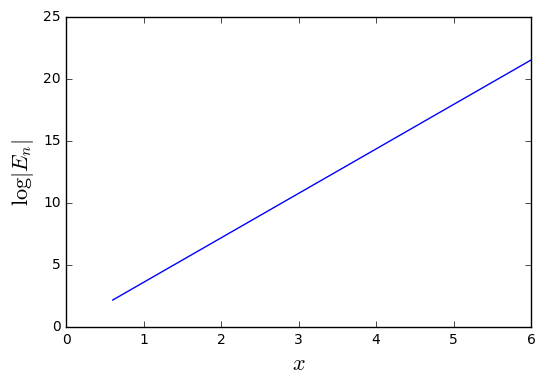

In [81]:
growth_rate_estimate(df,graph=True, label = '0.6')

Figure 1.1: A plot of $\log{|E_N|}$ against $x$ for the forward Euler method with $h=0.6$

which has gradient of approximately 3.586 (as verified below by our code) showing the error oscillates with magnitude $\approx e^{3.586 x}$

Below shows the results for $h=0.4,0.2,0.125,0.1$, with a judicious selection of output presented to illustrate the behaviour of our numerical solution.

    $Y_n$ Numerical Solution  $y(x_n)$ Exact Solution  Global Error $E_n$  \
0           6.0000000000e+00             0.6686584888    5.3313415112e+00   
1          -2.8378079724e+01             0.4493262033   -2.8827405927e+01   
2           1.5593760429e+02             0.3011942073    1.5563641009e+02   
3          -8.4025589791e+02             0.2018965180   -8.4045779443e+02   
4           4.5385932278e+03             0.1353352832    4.5384578925e+03   
5          -2.4507591419e+04             0.0907179533   -2.4507682137e+04   
6           1.3234153797e+05             0.0608100626    1.3234147716e+05   
7          -7.1464394017e+05             0.0407622040   -7.1464398093e+05   
8           3.8590775215e+06             0.0273237224    3.8590774942e+06   
9          -2.0839018452e+07             0.0183156389   -2.0839018470e+07   
10          1.1253069975e+08             0.0122773399    1.1253069974e+08   
11         -6.0766577858e+08             0.0082297470   -6.0766577859e+08   

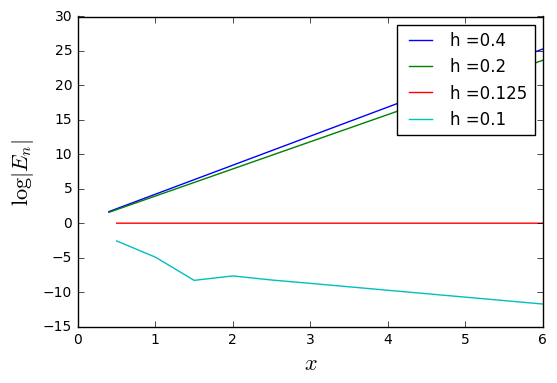

In [82]:
for h in hvals:
    df = forward_Euler_method(h=h,suppress=True)
    print(df)
    print(growth_rate_estimate(df,graph=True,label = h))
plt.legend()

Rough estimates of the growth rate have been given for each $h$, superimposed on a graph for illustration purposes. Reducing the value of $h$ decreases the growth rate. At however at $h=0.125$ the solution coverges erronously to $-1$.
With $h=0.1$ the solution converges to the analytical solution, with growth rate $\gamma = -1$

### Question 2

(i) To find the solution of 

$$  Y_{n+1} + (16h - 1)Y_{n} = 15h (e^{-h})^{n} , \quad Y_0 = 0 \qquad (2.1) $$

In the homogenous case, ansatz $ Y_{n} = A k^{n}, k \neq 0 $, which yields $ k = (1 - 16h) $. For the particular integral, we ansatz $  y_{n}^{p} = C (e^{-h})^{n} $, determining the constant $ C $ to be $ 15h / (e^{-h} + 16h - 1 ) $. 

Thus the general solution is given by

$$ Y_{n} = A (1 - 16h)^{n}  +  \frac{15 h}{e^{-h}  - 1 + 16h } (e^{-h})^{n} $$

Using the initial condition $Y_0=0$ to find the constant $A$, the solution is given by

$$ Y_{n} = \frac{15 h}{e^{-h}  - 1 + 16h }  \left(  (e^{-h})^{n} - (1 - 16h)^{n}  \right) $$

(ii) Instability occurs when the term $ (1 - 16h)^n \not\to 0 $ as $n \to \infty $, ie. when $\big| 1 - 16h \big| \geq 1 $, which occurs for $h \geq 0.125$


The numerical solution $Y_n$ diverges for $h> 0.125$; and also for $h = 0.125$, have $Y_n \to \pm 1$. For $h<0.125$ the solution converges, as $\lim\limits_{n \to \infty} (1 - 16h)^n = 0$

(iii)

In the limit $h \to 0 $, by L'Hopital's rule

$$ \frac{15 h}{e^{-h}  - 1 + 16h } \Big|_{h=0} \to  \frac{15}{-e^{-h}  + 16 } \Big|_{h=0} = 1$$

, and as $n \to \infty$,

$$ \left( 1 - \frac{16x_n}{n} \right)^{n} \to e^{-16x_n}, \quad (e^{-x_n/n})^{n} \to e^{x_n} $$

Hence 

$$ Y_n \to e^{-x_{n}} - e^{-16x_{n}} $$

so the solution of the difference equation (2.1) does indeed converge to the analytical soluton of equation (1.1) in the limit as $ n \to \infty $,  as required.



### Question 3

Using program (i) as before, this time with `graph = True`

,$Y_n$ Numerical Solution,$y(x_n)$ Exact Solution,Global Error $E_n$,x_values
0,0.6055379397,0.6061951971,-0.0006572573,0.5
1,0.3672773881,0.3678793286,-0.0006019406,1.0
2,0.2227649965,0.2231301601,-0.0003651636,1.5
3,0.1351138003,0.1353352832,-0.0002214830,2.0
4,0.0819506624,0.0820849986,-0.0001343362,2.5
5,0.0497055893,0.0497870684,-0.0000814790,3.0
6,0.0301479639,0.0301973834,-0.0000494195,3.5
7,0.0182856644,0.0183156389,-0.0000299745,4.0


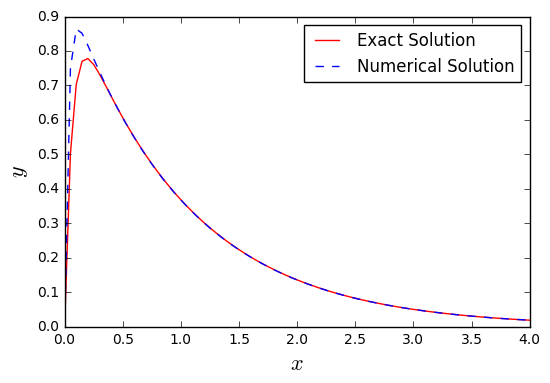

In [45]:
forward_Euler_method(h=0.05,suppress=True,graph=True,x_n=4)

Figure 3.1: Plot of numerical solution of ODE (1) implemented with the forward Euler method with $h=0.05$, with exact solution superimposed.

,$Y_n$ Numerical Solution,$y(x_n)$ Exact Solution,Global Error $E_n$,x_values
0,0.6061925322,0.6061951971,-0.0000026649,0.5
1,0.3678888588,0.3678793286,0.0000095302,1.0
2,0.2231359481,0.2231301601,0.0000057880,1.5
3,0.1353387938,0.1353352832,0.0000035106,2.0
4,0.0820871279,0.0820849986,0.0000021293,2.5
5,0.0497883599,0.0497870684,0.0000012915,3.0
6,0.0301981667,0.0301973834,0.0000007833,3.5
7,0.0183161140,0.0183156389,0.0000004751,4.0


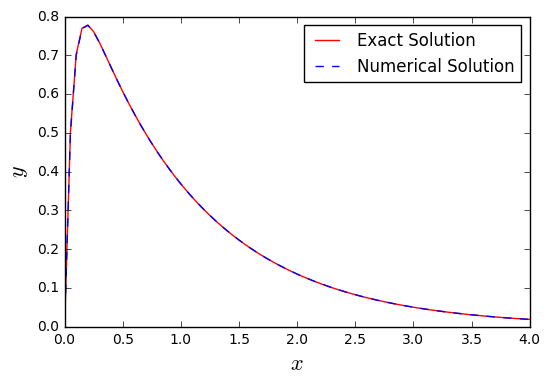

In [46]:
rk4_method(h=0.05,suppress=True,graph=True,x_n=4)

Figure 3.2: Plot of numerical solution of ODE (1) implemented with the forward Euler method with $h=0.05$, with exact solution superimposed.

Note that the fourth-order accuracy of the RK4 method becomes visible (and hence superior) compared with the first order accuracy of the forward Euler method.

### Question 4

The program shown at the end of the notebook, labelled 

`(iii) q4_error_h_comparison(method)`


For the Euler method,

,Global Error $E_n$ at $x_n =0.1$,k
0,0.7970591000,0
1,0.0813224541,1
2,0.0716563660,2
3,0.0338186500,3
4,0.0164449388,4
5,0.0081110427,5
6,0.0040282337,6
7,0.0020073650,7
8,0.0010020032,8
9,0.0005005829,9


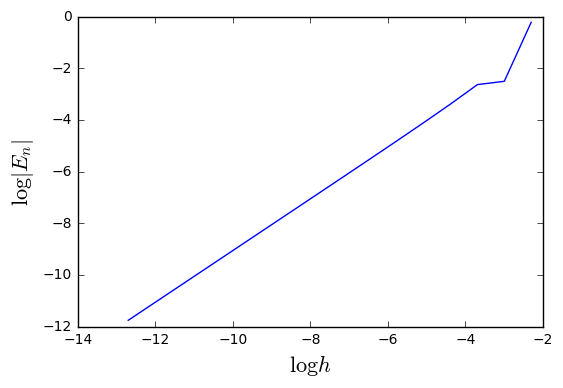

In [53]:
q4_error_h_comparison(method='E')

Figure 4.1: log-log graph of $|E_n|$ from the Euler method at $x_n = 0.1$, against $h = 0.1/2^k$ over the range $k = 0, 1, 2, \cdots, 15$.

Next, implement with the Runge-Kutta method

,Global Error $E_n$ at $x_n =0.1$,h,k
0,-6.8092244792e-02,0.1000000000,0
1,-1.4441722695e-03,0.0500000000,1
2,-9.5406729963e-05,0.0250000000,2
3,-5.0373166091e-06,0.0125000000,3
4,-2.8947052877e-07,0.0062500000,4
5,-1.7349235937e-08,0.0031250000,5
6,-1.0618581570e-09,0.0015625000,6
7,-6.5675131999e-11,0.0007812500,7
8,-4.0830672177e-12,0.0003906250,8
9,-2.5424107264e-13,0.0001953125,9


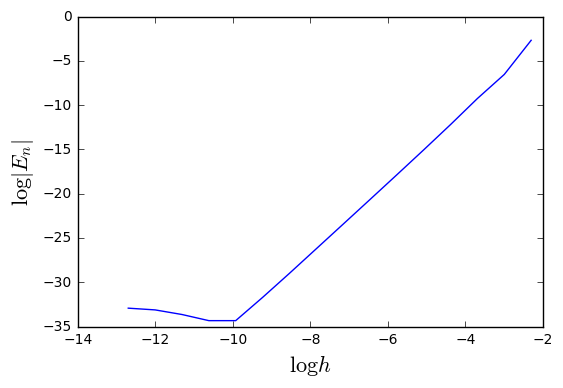

In [57]:
q4_error_h_comparison(method='RK4')

Figure 4.2: log-log graph of $|E_n|$ from the RK4 method at $x_n = 0.1$, against $h = 0.1/2^k$ over the range $k = 0, 1, 2, \cdots, 15$.

As expected, decreasing the step size $h$ decreases the magnitude of the global error. The gradient of the graph produced with RK4 is approximately 4 times the gradient of the graph produced with Euler, in agreement with $E_n$ approximately decreasing with order $h$ with Euler, and order $h^4$ with RK4.


### Question 5

We now consider the example

$$ \frac{d y}{d x} = 4y - 5e^{-x}, \quad y(0) = 1 \qquad (5.1) $$


The modified program to implement the forward Euler method is shown at the end of the notebook, labelled 

```(iv) q5_forward_Euler_method(h=0.001, suppress = True, x_n=10) ```

For $x_n = 10$ and $h = 0.001$,

In [83]:
q5_df = q5_forward_Euler_method()
q5_df 

,$Y_n$ Numerical Solution,$y(x_n)$ Exact Solution,Global Error $E_n$,x_values
0,-6.7537816693e+00,0.6065306597,-7.3603123290e+00,0.5
1,-5.3801758302e+01,0.3678794412,-5.4169637743e+01,1.0
2,-3.9844599795e+02,0.2231301601,-3.9866912811e+02,1.5
3,-2.9339249515e+03,0.1353352832,-2.9340602868e+03,2.0
4,-2.1593537169e+04,0.0820849986,-2.1593619254e+04,2.5
5,-1.5892115329e+05,0.0497870684,-1.5892120308e+05,3.0
6,-1.1696023641e+06,0.0301973834,-1.1696023943e+06,3.5
7,-8.6078492435e+06,0.0183156389,-8.6078492618e+06,4.0
8,-6.3350647420e+07,0.0111089965,-6.3350647431e+07,4.5
9,-4.6623777994e+08,0.0067379470,-4.6623777995e+08,5.0


Clearly the numerical solution does not converge.
It is true that the magnitude of the global error grows exponentially with $x$, as verified below by plotting $\log|E_n|$. The growth rate is approximately 4.

array([ 3.99203639,  3.99202945,  3.99202194,  3.99202133,  3.99202127,
        3.99202127,  3.99202127,  3.99202127,  3.99202127,  3.99202127,
        3.99202127,  3.99202127,  3.99202127,  3.99202127,  3.99202127,
        3.99202127,  3.99202127,  3.99202127,  3.99202127,  3.99202127])

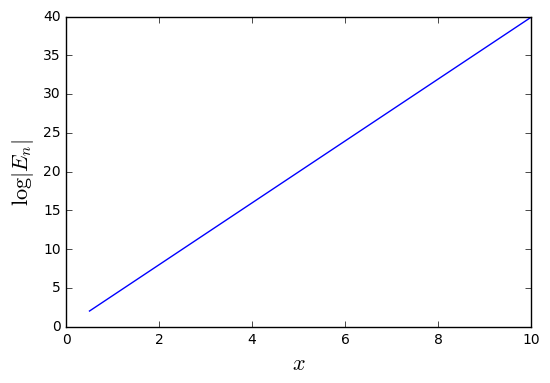

In [84]:
growth_rate_estimate(q5_df,graph=True)

Figure 5.1: Illustration that the magnitude of the global error oscillates proprotional to $e^{4x}$

The corresponding Euler difference equatation is 



$$  Y_{n+1} =  Y_n + h (4 Y_n - 5(e^{-h})^{n}) , \quad Y_0 = 1 \qquad (5.2) $$

which is solved similarly to (2.1) by rearranging to

$$  Y_{n+1} - (1+4h)Y_{n} = - 5h (e^{-h})^{n}  $$

In the homogenous case, ansatz $ Y_{n} = A k^{n}, k \neq 0 $, which yields $ k = (1 + 4h) $. For the particular integral, we ansatz $  y_{n}^{p} = C (e^{-h})^{n} $, determining the constant $ C $ to be $ - 5h / (e^{-h} - 1 - 4h) $ 

Thus the general solution is given by

$$ Y_{n} = A (1 + 4h)^{n}  +  \frac{-5 h}{e^{-h} -1 - 4h } (e^{-h})^{n} $$

Using the initial condition $Y_0=1$ to find the constant $A$, the solution is given by

$$ Y_{n} = \frac{1}{e^{-h} - 1 - 4h}  \left(  -5h(e^{-h})^{n} - (e^{-h} - 1 + h)(1 + 4h)^{n}  \right) $$

Hence, we see that $(1+4h)^n \to \infty $ as $n \to \infty $, no matter how small the value of $h$ we choose, as $(1+4h) > 1$. 
Computationally, the surviving term with $x_n = nh $ coverges to $e^{4x}$, thus explaning the growth rate

By the same reasoning, Runge-Kutta method will also diverge for any $h$. No numerical solution can be found.

## Numerical Solutions of second-order ODEs

### Question 6

Have that 


$$\frac{\mathrm{d}^{2} y }{\mathrm{d} x^{2} } + p^{2}(1+x)^{-4} = 0 \qquad (6.1) $$ 


With $p=0$ equation (6.1) has general solution 

$$ y = \begin{cases} A(1+x)\sin(p(1+x)^{-1} - \phi )  & \text{ if } p \neq 0 \\ Bx + C & \text{ if } p = 0 \end{cases} $$

The particular solution for the ODE that satisfies 

$$ y = 0, \quad \mathrm{d} y / \mathrm{d} x = 1 \; \text{ at } \; x = 0  $$

is found as follows. 

First, the $ p \neq 0 $  case: Applying the boundary condition $ y(0) = 0 $ to (6.1) gives

$$ A \sin ( p - \phi) = 0 $$ 

Thus as $A \neq 0$ we have $ p - \phi = n \pi $. Next,

$$  \frac{\mathrm{d} y}{\mathrm{d} x}= A(1+x)\cos(p(1+x)^{-1} - \phi ) (-p(1+x)^{-2})  + A\sin(p(1+x)^{-1} - \phi ) $$

Thus
 
\begin{align*}
\frac{\mathrm{d} y}{\mathrm{d} x} \Big|_{x=0} & = -Ap \cos(p - \phi ) \\
& = -Ap (-1)^{n}
\end{align*}

yielding $ A = (-1)^{n+1}/p $. Thus the particular solution is given by

\begin{align*}
y & = (-1)^{n+1} p^{-1} (1+x) \sin(-xp(1+x)^{-1} + n \pi) \\
\end{align*}

which simplifies to

\begin{align*}
y & = p^{-1} (1+x) \sin(xp(1+x)^{-1} )
\end{align*}

Simalrly for $p=0$ we yield $B=1, C = 0$.

Therefore the particular solution is given by

$$ y = \begin{cases} p^{-1} (1+x) \sin(xp(1+x)^{-1} )  & \text{ if } p \neq 0 \\ x  & \text{ if } p = 0 \end{cases} $$

If instead (6.1) satifies the boundary conditions 

$$ y(0) = y(1) = 0 \qquad (6.2) $$

Have already shown that $y(0)=0$ yields


$$  p - \phi = m \pi, \quad m \in \mathbb{Z}  \qquad (6.3) $$


while the $y(1)= 0$ boundary condition yields

$$ \sin (p/2 - \phi) = 0 $$

using (6.3) this becomes $$ \sin (p/2 - p + m \pi) = 0 $$

$$(-1)^m \sin (p/2) = 0 \implies p = 2 n \pi, \quad n \in \mathbb{Z} $$ 


Note that $p \neq 0 \implies n \neq 0$. The smallest non-negative eigenvalue $p= 2\pi $ when $n=1$.

The corresponding (unnormalised) eigenfunctions are given by

$$ y_n =  (1+x)\sin(2n \pi(1+x)^{-1} + (m - 2n) \pi ) $$

ie.

$$ y_n = (1+x)\sin(2n \pi(1+x)^{-1})  $$

where we have omitted the factor of $(-1)^m$

### Programming Task

The program to compute the numerical approximation to the system of equations

$$  \frac{\mathrm{d}y}{\mathrm{d} x} = z, \qquad \frac{\mathrm{d} z}{\mathrm{d} x} = -p^{2}(1+x)^{-\alpha}y \qquad (6.4) $$

with inital condition

$$  y = 0, \; \mathrm{d} y / \mathrm{d} x = 1 \text{  at  } x = 0 \qquad (6.5) $$

using the vector generalization of the RK4 method is shown at the end of the notebook, labelled

```vector_rk4_method(h = 0.1, p = 6, graph = False,x_n = 1):```

### Question 7

The program tabulating the numerical solution is shown at the end of the notebook, labelled 

```(ii) q7_error_h_comparison(p=6)```

For $p = 6$,

,$Y_n$ Numerical Solution,Global Error $E_n$,h
0,0.0471181746,7.8171898068e-05,0.1000000000
1,0.0470468192,6.8165573453e-06,0.0500000000
2,0.0470404684,4.6573967424e-07,0.0250000000
3,0.0470400327,2.9972320757e-08,0.0125000000
4,0.0470400046,1.8940948185e-09,0.0062500000
5,0.0470400028,1.1893393215e-10,0.0031250000
6,0.0470400027,7.4489650559e-12,0.0015625000
7,0.0470400027,4.6564835321e-13,0.0007812500
8,0.0470400027,2.8962943155e-14,0.0003906250
9,0.0470400027,1.5334955528e-15,0.0001953125


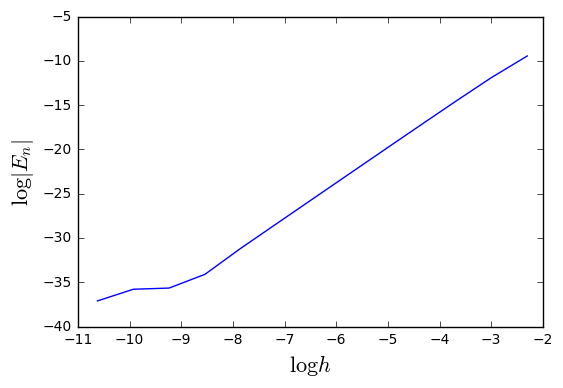

In [96]:
q7_error_h_comparison(p=6)

,$Y_n$ Numerical Solution,Global Error $E_n$,h
0,-0.0999497667,2.7401267604e-04,0.1000000000
1,-0.1002052535,1.8525881502e-05,0.0500000000
2,-0.1002226380,1.1413408197e-06,0.0250000000
3,-0.1002237095,6.9846123968e-08,0.0125000000
4,-0.1002237750,4.3038807795e-09,0.0062500000
5,-0.1002237791,2.6683877330e-10,0.0031250000
6,-0.1002237793,1.6606452324e-11,0.0015625000
7,-0.1002237793,1.0352829705e-12,0.0007812500
8,-0.1002237793,6.4892535789e-14,0.0003906250
9,-0.1002237793,3.9412917374e-15,0.0001953125


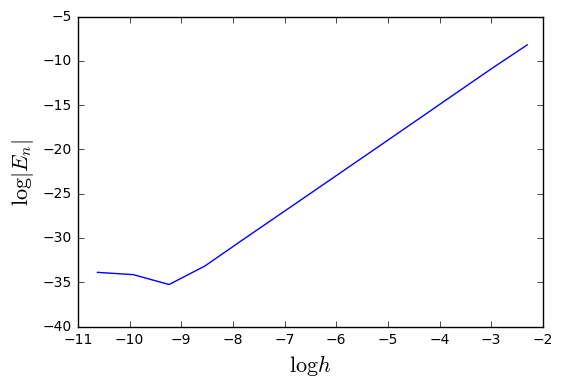

In [98]:
q7_error_h_comparison(p=7)

In both cases it can be seen that the gradient of the graph is approximately 4, clarifying the 4th order accuarcy of the RK4 method.

### Programming Task

The program to search for eigenvalues of the system

$$\frac{\mathrm{d}^{2} y }{\mathrm{d} x^{2} } + p^{2}(1+x)^{-4} = 0 \qquad (6.1) $$ 

$$ y = 0, \quad \mathrm{d} y / \mathrm{d} x = 1 \; \text{ at } \; x = 0  $$

with $g(p)$ taken as the numerical solution $Y_n$ at $x_n = 1$, with a suitably small value of $h$, is shown at the end of the notebook, labelled

```(iii) q8```

### Question 9

The modified program to give the numerical solution to the system (12a)-(12b) with $alpha=8$ (using RK4) is shown at the end of the notebook, labelled 

q9_vector_rk4_method(h = 0.1, p = 6, graph = False,x_n = 1):

and the program to search for eigenvalues within a given range $[p1,p2]$ is 

`q9_eval_search(h=0.001,epsilon = 2.5e-6, p1 = 0, p2 = 7)`

As we do not know where the eigenvalues lie, we first write a small function that will iterate through the positive integers, returning pairs in between which the function changes sign.

In [155]:
q9_vector_rk4_method(p=44.275)

,$Y_n$ Numerical Solution,x_values
0,-0.1211319506,0.1
1,0.0257226477,0.2
2,-0.0509919001,0.3
3,-0.0238480658,0.4
4,0.0364793153,0.5
5,0.0733652524,0.6
6,0.0781635865,0.7
7,0.0609343944,0.8
8,0.0325185999,0.9
9,0.0000705723,1.0


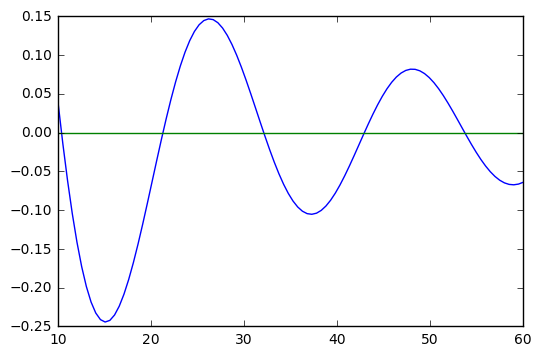

In [170]:
x = np.linspace(10,60,100)
y = list(map(lambda x: q9_vector_rk4_method(h=0.001,p=x).values[-1,0],x))
z = np.zeros_like(x)
plt.plot(x,y)
plt.plot(x,z)

In [171]:
t = []
i = 0
while len(t) < 6:
    r0 = q9_vector_rk4_method(p=i).values[-1,0]
    r1 = q9_vector_rk4_method(p=i+1).values[-1,0]
    if np.sign(r1) - np.sign(r0) != 0:
        t.append(i)
    i = i+1    
t

[10, 21, 29, 38, 44, 56]

In [144]:
q9_eval_search(h=0.01,epsilon = 2.5e-6, p1 = 44.25, p2 = 44.3)

4.45735775579e-07
             est             p1             p2
0  42.8003336115  44.2500000000  44.3000000000
1  42.8003336115  44.2500000000  42.8003336115
2  42.9278450387  42.9278450387  42.8003336115
3  42.9213475318  42.9213475318  42.8003336115


In [116]:
q9_eval_search(h=0.001,epsilon = 2.5e-6, p1 = 56, p2 = 57)

-1.0238561052e-07
             est             p1             p2
0  52.6874596051  56.0000000000  57.0000000000
1  52.6874596051  52.6874596051  57.0000000000
2  53.9007681895  52.6874596051  53.9007681895
3  53.7203073990  52.6874596051  53.7203073990
4  53.7191165613  52.6874596051  53.7191165613


In [139]:
for ele in t:
    q9_eval_search(h=0.001,epsilon = 2.5e-6, p1 = ele-1, p2 = ele)
    

8.15609643057e-08
             est             p1  p2
0  10.3267148995   9.0000000000  10
1  10.3267148995  10.3267148995  10
2  10.3579818366  10.3579818366  10
3  10.3588937190  10.3588937190  10
4  10.3589204478  10.3589204478  10
-5.05830605345e-07
             est  p1             p2
0  21.2558924254  20  21.0000000000
1  21.2558924254  20  21.2558924254
2  21.2636514979  20  21.2636514979
3  21.2639199624  20  21.2639199624
-1.96723509908e-07
             est            p1             p2
0  33.4360958634  28.000000000  29.0000000000
1  33.4360958634  28.000000000  33.4360958634
2  32.0514711180  32.051471118  33.4360958634
3  32.1088987477  32.051471118  32.1088987477
4  32.1053909117  32.051471118  32.1053909117
4.10353317537e-09
              est              p1              p2
0   77.9515971024   37.0000000000   38.0000000000
1   77.9515971024   37.0000000000   77.9515971024
2   98.9915240009   37.0000000000   98.9915240009
3  116.7853800279  116.7853800279   98.9915240009
4  1

In [161]:
plist = [p1,p2,p3,p4,p5,poww]

In [160]:
p1 = 10.3589391807
p2 = 21.263929800 
p3 = 32.1053853815
p4 = 42.9193379399
p5 = 53.7191165613
poww = 44.275

In [163]:
q9_vector_rk4_method(p=44.275)

,$Y_n$ Numerical Solution,x_values
0,-0.1211319506,0.1
1,0.0257226477,0.2
2,-0.0509919001,0.3
3,-0.0238480658,0.4
4,0.0364793153,0.5
5,0.0733652524,0.6
6,0.0781635865,0.7
7,0.0609343944,0.8
8,0.0325185999,0.9
9,0.0000705723,1.0


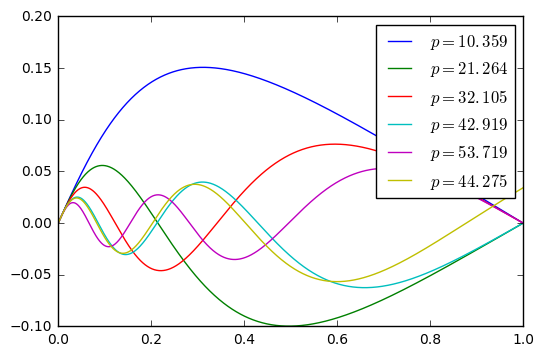

In [164]:
# fig, ax = plt.subplots(figsize=(12, 6))
for p in plist:
    x_val = q9_vector_rk4_method(h=0.001,p=p).values[:,1]
    y_val = q9_vector_rk4_method(h=0.001,p=p).values[:,0]
    plt.plot(x_val,y_val, label = '$p = {}$'.format(round(p,3)))
plt.legend()

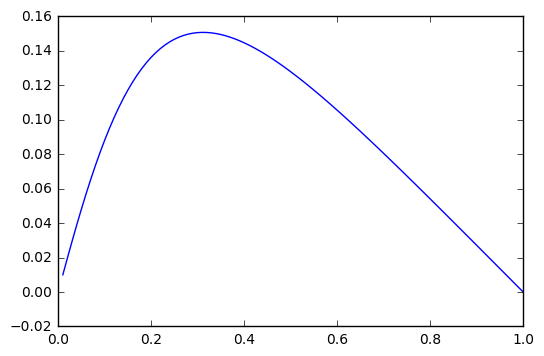

In [112]:
plt.plot(x_val,y_val)

In [94]:
q9_eval_search(h=0.001,epsilon = 2.5e-6, p1 = 10, p2 = 11)

-1.81113716953e-06


,est,p1,p2
0,10.3797090528,10,11.0000000000
1,10.3797090528,10,10.3797090528
2,10.3595326580,10,10.3595326580
3,10.3589391807,10,10.3589391807


In [95]:
q9_eval_search(h=0.001,epsilon = 2.5e-6, p1 = 21, p2 = 22)

9.32705097152e-09


,est,p1,p2
0,21.273857898,21.000000000,22.000000000
1,21.273857898,21.273857898,22.000000000
2,21.263526449,21.273857898,21.263526449
3,21.263929800,21.263929800,21.263526449


In [96]:
q9_eval_search(h=0.001,epsilon = 2.5e-6, p1 = 29, p2 = 30)

-9.30055739238e-10


,est,p1,p2
0,32.4267552270,29.0000000000,30.0000000000
1,32.4267552270,29.0000000000,32.4267552270
2,32.0964826888,32.0964826888,32.4267552270
3,32.1054839865,32.0964826888,32.1054839865
4,32.1053853815,32.0964826888,32.1053853815


## Programs

In [1]:
#imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
pd.set_option('precision', 10)
%matplotlib inline

### Stability and accuracy of the numerical methods

`(i) forward_Euler_method(h, suppress = False, graph = False, x_n=6)`

In [2]:
def forward_Euler_method(h, suppress = False, graph = False, x_n=6):
    '''Implements forward Euler method for problem (5a) with a given step size h and x_n, and iterates until Y_n is computed.
    At each step returns the tabulated values of x, exact sol, numerical sol and global error , stored in a Pandas DataFrame.
    suppress = True, return only a judicious output of values.
    If graph = True, plots Y superimposed with y. '''
    def y(x):
        return np.exp(-x) - np.exp(-16*x)

    def f(x,y):
        return -16* y + 15 * np.exp(-x)

    x0 = 0
    Y0 = 0
    
    x = np.arange(x0,x_n+h,h)
    Y = np.zeros(len(x))
    Y[0] = Y0
    
    for i in range(len(x) - 1):
        Y[i+1] = Y[i] + h * f(x[i],Y[i])

    y = y(x)
    global_error = Y - y
    
    if graph == True:
        exact, = plt.plot(x,y, 'r',label='Exact Solution')
        numerical, = plt.plot(x,Y,'b--', label='Numerical Solution')
        plt.legend(handles=[exact,numerical])
        plt.xlabel('$x$', fontsize = 16)
        plt.ylabel('$y$', fontsize = 16)
   
    if suppress == True:
        a = int(np.floor(1/(2*h)))
        y = y[::a]
        x = x[::a]
        Y = Y[::a]
        global_error = global_error[::a]

    
    df = pd.DataFrame( 
        {'x_values': x[1:],
        '$Y_n$ Numerical Solution': Y[1:],
        '$y(x_n)$ Exact Solution':y[1:],
        'Global Error $E_n$'  : global_error[1:]}
    )
    return df

`(ii) rk4_method(h, suppress = False, graph = False,x_n = 6):`

In [3]:
def rk4_method(h, suppress = False, graph = False,x_n = 6):
    '''Implements RK4 method for problem (5a) with a given step size h and x_n, and interates until Y_n is computed.
    See (i) forward_Euler_method. '''
    def y(x):
        return np.exp(-x) - np.exp(-16*x)

    def f(x,y):
        return -16* y + 15 * np.exp(-x)

    x0 = 0
    Y0 = 0
    
    x = np.arange(x0,x_n+h,h)
    Y = np.zeros(len(x))
    Y[0] = Y0

    for i in range(len(x) - 1):
         k1 = h * f(x[i],Y[i])
         k2 = h * f(x[i] + h/2,Y[i] + k1/2)
         k3 = h * f(x[i] + h/2,Y[i] + k2/2)
         k4 = h * f(x[i] + h,Y[i] + k3)
         Y[i+1] = Y[i] + (k1 + 2*k2 + 2*k3 + k4) * 1/6

    y = y(x)
    global_error = Y - y
    
    
    if graph == True:
        exact, = plt.plot(x,y, 'r',label='Exact Solution')
        numerical, = plt.plot(x,Y,'b--', label='Numerical Solution')
        plt.legend(handles=[exact,numerical])
        plt.xlabel('$x$', fontsize = 16)
        plt.ylabel('$y$', fontsize = 16)
        
    #provide only judicious output    
    if suppress == True:
        a = int(np.floor(1/(2*h)))
        y = y[::a]
        x = x[::a]
        Y = Y[::a]
        global_error = global_error[::a]

    
    df = pd.DataFrame( 
        {'x_values': x[1:],
        '$Y_n$ Numerical Solution': Y[1:],
        '$y(x_n)$ Exact Solution':y[1:],
        'Global Error $E_n$'  : global_error[1:]}
    )
    return df

`(iii) q4_error_h_comparison(method)`

In [4]:
def q4_error_h_comparison(method):
    '''Tabulates the global error for problem (5a) (at x_n = 0.1) against h = 0.1/n for n = 2^k with k = 0, 1, 2, ..., 15, 
    and plots a log-log graph of |E_n| against h over this range.
    Requires input of the iterative method to be used; either E (for Euler) or RK4'''
    
    hs = []
    global_error = []

    for k in range(0,16):
        n= 2**k
        h = (0.1/n)

        hs.append(h)
        if method == 'E':
            global_error.append(forward_Euler_method(h, x_n = 0.1)['Global Error $E_n$'].values[-1])
        elif method == 'RK4':
            global_error.append(rk4_method(h, x_n = 0.1)['Global Error $E_n$'].values[-1])
            
    y = np.log(np.abs(global_error))
    x = np.log(hs)
    plt.plot(x,y)
    plt.xlabel('$\log{h}$', fontsize = 16)
    plt.ylabel('$\log{|E_n|}$', fontsize = 16)

    df = pd.DataFrame({
         'h':hs,
         'Global Error $E_n$ at $x_n =0.1$'  : global_error,
        })
    return df

`(iv) q5_forward_Euler_method(h=0.001, suppress = True, x_n=10):`

In [5]:
def q5_forward_Euler_method(h=0.001, suppress = True, x_n=10):
    '''Implements forward Euler method for problem (8a).
    See (i) forward_Euler_method.'''
    
    def y(x):
        return np.exp(-x)
    def f(x,y):
        return 4* y -5 * np.exp(-x)

    x0 = 0
    Y0 = 0
    
    x = np.arange(x0,x_n+h,h)
    Y = np.zeros(len(x))
    Y[0] = Y0
    
    for i in range(len(x) - 1):
        Y[i+1] = Y[i] + h * f(x[i],Y[i])

    y = y(x)
    global_error = Y - y
    
  
    if suppress == True:
        a = int(np.floor(1/(2*h)))
        y = y[::a]
        x = x[::a]
        Y = Y[::a]
        global_error = global_error[::a]

    
    df = pd.DataFrame( 
        {'x_values': x[1:],
        '$Y_n$ Numerical Solution': Y[1:],
        '$y(x_n)$ Exact Solution':y[1:],
        'Global Error $E_n$'  : global_error[1:]}
    )
    return df

## Numerical Solutions of second-order ODEs

`(i) vector_rk4_method(h = 0.1, p = 6, graph = False,x_n = 1)`

In [14]:
def vector_rk4_method(h = 0.1, p = 6, graph = False,x_n = 1):
    '''Implements vector generalisation of RK4 method for problem (12a)-(12b) with a given step size h and x_n, and 
    iterates until Y_n is computed. 
    Modified version of (ii) rk4_method.
    Allows input of step size h = 0.1, value of p, and x_n'''
    alpha = 4

    def y(x):
        return - (1/p)* (1 + x) * np.sin( (-x*p)/(x+1)   ) 

    def f(x,vect):
        return np.array([vect[1],-p**2 * (1 + x)**(-alpha)*vect[0]])
    
    x0 = 0
    Y0 = [0,1]

    x = np.arange(x0,x_n+h,h)
    Y = np.zeros([2,len(x)])
    

    Y[:,0] = Y0

    for i in range(len(x) - 1):
         k1 = h * f(x[i],Y[:,i])
         k2 = h * f(x[i] + h/2,Y[:,i] + k1/2)
         k3 = h * f(x[i] + h/2,Y[:,i] + k2/2)
         k4 = h * f(x[i] + h,Y[:,i] + k3)
         Y[:,i+1] = Y[:,i] + (k1 + 2*k2 + 2*k3 + k4) * 1/6


    y = y(x)
    global_error = Y[0,:] - y
    
    
    if graph == True:
        exact, = plt.plot(x,y, 'r',label='Exact Solution')
        numerical, = plt.plot(x,Y[0],'b--', label='Numerical Solution')
        plt.legend(handles=[exact,numerical])

    
    df = pd.DataFrame( 
        {'x_values': x[1:],
        '$Y_n$ Numerical Solution': Y[0,1:],
        '$y(x_n)$ Exact Solution':y[1:],
        'Global Error $E_n$'  : global_error[1:] 
        })
    return df

`(ii) q7_error_h_comparison(p=6)`

In [7]:
def q7_error_h_comparison(p=6):   
    '''Tabulates the global error for problem (12a)-(12b) (at x_n = 1) against h = 0.1/n for n = 2^k with k = 0, 1, 2, ..., 12, 
    and plots a log-log graph of |E_n| against h over this range.'''
    k = range(0,13)
    hs = list(map(lambda x: 0.1/ (2**x) , k))

    numerical_sol = []
    g_errors = []


    for h in hs:

        numerical_sol.append(vector_rk4_method(h=h,p=p).values[-1,0])
        g_errors.append(vector_rk4_method(h=h,p=p).values[-1,2])
        
    y = np.log(np.abs(g_errors))
    x = np.log(hs)
    plt.plot(x,y)
    plt.xlabel('$\log{h}$', fontsize = 16)
    plt.ylabel('$\log{|E_n|}$', fontsize = 16)

    df = pd.DataFrame( 
        {'h': hs,
        '$Y_n$ Numerical Solution': numerical_sol,
        'Global Error $E_n$'  : g_errors
        })
    return df

In [13]:
def q8_eval_search(h=0.001,epsilon = 2.5e-6):
    def g(p):
        return vector_rk4_method(h=h,p=p).values[-1,0]
    
    p1list = []
    p2list = []
    estlist = []
    p1 = 6
    p2 = 7
    est = (g(p2)*p1 - g(p1)*p2)/(g(p2) - g(p1) )
    p1list.append(p1)
    p2list.append(p2)
    estlist.append(est)
    while np.abs(g(est)) > epsilon:
        est = (g(p2)*p1 - g(p1)*p2)/(g(p2) - g(p1) )
        if g(est) < 0:
            p2 = est
        else:
            p1 = est
        p1list.append(p1)
        p2list.append(p2)
        estlist.append(est)
    df = pd.DataFrame({'p1':p1list,
                      'p2':p2list,
                      'est':estlist})
    print(g(est))
    return df

In [12]:
q8_eval_search()

9.10060301885e-08


,est,p1,p2
0,12.5845661781,12.0000000000,13.0000000000
1,12.5845661781,12.5845661781,13.0000000000
2,12.5655879474,12.5845661781,12.5655879474
3,12.5663717585,12.5663717585,12.5655879474


In [16]:
vector_rk4_method?

In [147]:
def q9_vector_rk4_method(h = 0.1, p = 6, graph = False,x_n = 1):
    '''Modified version of 'vector_rk4_method'. 
    Implements vector generalisation of RK4 method for the alpha = 8 problem (12a)-(12b) 
    with a given step size h and x_n, and iterates until Y_n is computed. 
    Note there is no exact solution (or global error).
    Modified version of (ii) rk4_method.
    Allows input of step size h = 0.1, value of p, and x_n'''
    alpha = 8

    def f(x,vect):
        return np.array([vect[1],-p**2 * (1 + x)**(-alpha)*vect[0]])
    
    x0 = 0
    Y0 = [0,1]

    x = np.arange(x0,x_n+h,h)
    Y = np.zeros([2,len(x)])
    

    Y[:,0] = Y0

    for i in range(len(x) - 1):
         k1 = h * f(x[i],Y[:,i])
         k2 = h * f(x[i] + h/2,Y[:,i] + k1/2)
         k3 = h * f(x[i] + h/2,Y[:,i] + k2/2)
         k4 = h * f(x[i] + h,Y[:,i] + k3)
         Y[:,i+1] = Y[:,i] + (k1 + 2*k2 + 2*k3 + k4) * 1/6


    
    if graph == True:
        numerical, = plt.plot(x,Y[0],'b--', label='Numerical Solution')
        plt.legend(handles=[exact,numerical])

    
    df = pd.DataFrame( 
        {'x_values': x[1:],
        '$Y_n$ Numerical Solution': Y[0,1:], 
        })
    return df

In [21]:
q9_vector_rk4_method()

,$Y_n$ Numerical Solution,x_values
0,0.0959389638,0.1
1,0.1770679241,0.2
2,0.2435576428,0.3
3,0.2992344895,0.4
4,0.3475236793,0.5
5,0.3908636333,0.6
6,0.4308817268,0.7
7,0.4686465112,0.8
8,0.5048612344,0.9
9,0.5399934532,1.0


In [217]:
def q9_eval_search(p1,h=0.01,epsilon = 2.5e-6):
    p2 = p1 + 1
    def g(p):
        return q9_vector_rk4_method(h=h,p=p).values[-1,0]
   
    est = (g(p2)*p1 - g(p1)*p2)/(g(p2) - g(p1) )
    df = pd.DataFrame(columns=['p1', 'p2', 'est'])
    
    df.loc[0] = [p1,p2,est]
    i = 1
    while np.abs(g(est)) > epsilon:
        est = (g(p2)*p1 - g(p1)*p2)/(g(p2) - g(p1) )
        if g(est) < 0:
            p2 = est
        else:
            p1 = est
        
        df.loc[i] = [p1,p2,est]
        i += 1
    print(df)
    return est